In [2]:
from sleepeeg.pipeline import SpectralPipe, GrandSpectralPipe

In [3]:
pipe1 = SpectralPipe(
    # can be any type of eeg file that MNE's read_raw() function supports.
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\EL3001\cleaned_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\grand",  # A directory you want the results to be saved in
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\EL3001\staging.txt",  # Point-per-row type of hypnogram
    hypno_freq=1,  # Hypnogram's sampling frequency (visbrain's hypnograms default to 1)
)

pipe2 = SpectralPipe(
    # can be any type of eeg file that MNE's read_raw() function supports.
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\EL3003\cleaned_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\grand",  # A directory you want the results to be saved in
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\EL3003\staging.txt",  # Point-per-row type of hypnogram
    hypno_freq=1,  # Hypnogram's sampling frequency (visbrain's hypnograms default to 1)
)

pipe3 = SpectralPipe(
    # can be any type of eeg file that MNE's read_raw() function supports.
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\EL3005\cleaned_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\grand",  # A directory you want the results to be saved in
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\EL3005\staging.txt",  # Point-per-row type of hypnogram
    hypno_freq=1,  # Hypnogram's sampling frequency (visbrain's hypnograms default to 1)
)

Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\cleaned_raw.fif...
    Range : 0 ... 1994499 =      0.000 ...  7977.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\cleaned_raw-1.fif...
    Range : 1994500 ... 3988999 =   7978.000 ... 15955.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\cleaned_raw-2.fif...
    Range : 3989000 ... 5983499 =  15956.000 ... 23933.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\cleaned_raw-3.fif...
    Range : 5983500 ... 5985607 =  23934.000 ... 23942.428 secs
Ready.


Hypnogram is SHORTER than data by 0.43 seconds. Padding hypnogram with last value to match data.size.


Opening raw data file C:\Users\Gennadiy\Documents\data\EL3003\cleaned_raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 1994499 =      0.000 ...  7977.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3003\cleaned_raw-1.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 1994500 ... 3988999 =   7978.000 ... 15955.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3003\cleaned_raw-2.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 3989000 ... 5983499 =  15956.000 ... 23933.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3003\cleaned_raw-3.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 5983500 ... 6961683 =  23934.000 ... 27846.732 secs
Ready.


Hypnogram is SHORTER than data by 0.74 seconds. Padding hypnogram with last value to match data.size.


Opening raw data file C:\Users\Gennadiy\Documents\data\EL3005\cleaned_raw.fif...
    Range : 0 ... 2039999 =      0.000 ...  8159.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3005\cleaned_raw-1.fif...
    Range : 2040000 ... 4079999 =   8160.000 ... 16319.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3005\cleaned_raw-2.fif...
    Range : 4080000 ... 5785273 =  16320.000 ... 23141.092 secs
Ready.


Hypnogram is SHORTER than data by 0.1 seconds. Padding hypnogram with last value to match data.size.


In [6]:
grand_pipe = GrandSpectralPipe(
    pipes=[pipe1, pipe2, pipe3], output_dir=r"C:\Users\Gennadiy\Documents\data\grand"
)

In [8]:
grand_pipe.compute_psds_per_stage(
    # A dict describing stages and their indices in the hypnogram file.
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},
    # Rereferencing to apply. Can be list of str channels or "average".
    # If None, will not change the reference.
    reference="average",
    method="welch",  # welch or multitaper
    fmin=0,  # Lower frequency bound.
    fmax=60,  # Upper frequency bound.
    picks="eeg",  # Channels to compute the PSD for.
    reject_by_annotation=True,  # Whether to reject epochs annotated as BAD.
    save=True,  # Whether to save the average PSD hdf5 file for each sleep stage.
    overwrite=True,  # Whether to overwrite hdf5 files if there are any.
    n_jobs=-1,  # n_jobs, refer to the MNE documentation.
    verbose=False,  # verbose, refer to the MNE documentation.
    # Additional arguments passed to the PSD computing method, i.e., welch or multitaper:
    n_fft=2048,
    n_per_seg=1024,
    n_overlap=512,
    window="hann",
)

Reading 0 ... 5985607  =      0.000 ... 23942.428 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting 289559 of 5985608 (4.84%) samples to NaN, retaining 5696049 (95.16%) samples.
Setting 289559 of 5985608 (4.84%) samples to NaN, retaining 5696049 (95.16%) samples.
Setting 289559 of 5985608 (4.84%) samples to NaN, retaining 5696049 (95.16%) samples.
Setting 289559 of 5985608 (4.84%) samples to NaN, retaining 5696049 (95.16%) samples.
Setting 289559 of 5985608 (4.84%) samples to NaN, retaining 5696049 (95.16%) samples.
Reading 0 ... 6961683  =      0.000 ... 27846.732 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.
Setting 483728 of 6961684 (6.95%) samples to NaN, retaining 6477956 (93.05%) samples.
Setting 483728 of 6961684 (6.95%) samples to NaN, retaining 6477956 (93.05%) samples.
Setting 

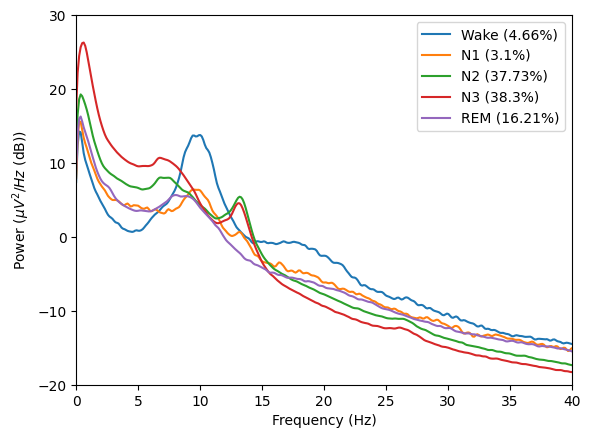

In [11]:
grand_pipe.plot_psds(
    picks=["E101"],
    psd_range=(-20, 30),  # Y axis limits
    freq_range=(0, 40),  # X axis limits
    dB=True,
    xscale="linear",  # Matplotlib xscale. Can be {"linear", "log", "symlog", "logit", ...} or ScaleBase
    axis=None,
    save=True,  # Whether to save the plot as a png file.
)

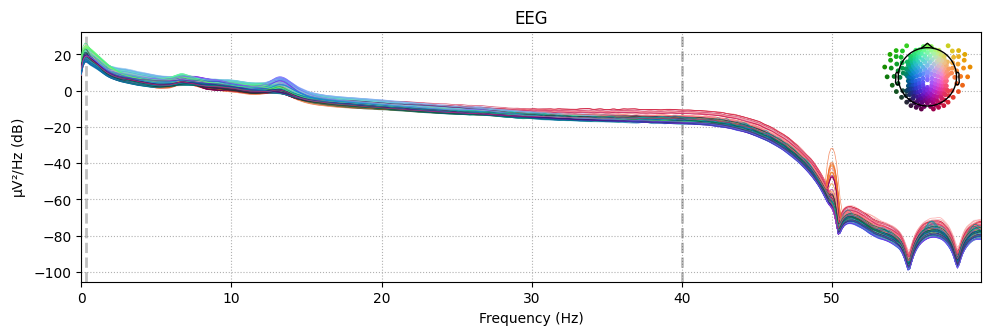

In [12]:
_ = grand_pipe.psds["N2"].plot(picks="data", exclude="bads", show=False)

You can access  the grand average PSD through grand_pipe and the per-subject psds through corresponding pipe objects.

In [14]:
grand_pipe.psds["REM"].get_data(), pipe1.psds["REM"].get_data()

(array([[6.33323452e-11, 2.22273085e-10, 3.43744157e-10, ...,
         1.09378385e-20, 1.10850805e-20, 1.09494817e-20],
        [5.14588919e-11, 1.79609183e-10, 2.78076093e-10, ...,
         9.29599903e-21, 9.65963108e-21, 9.64593068e-21],
        [3.50318807e-11, 1.19162711e-10, 1.82470519e-10, ...,
         9.29348228e-21, 9.53803139e-21, 9.35890209e-21],
        ...,
        [1.46308200e-11, 4.73532796e-11, 7.15147840e-11, ...,
         8.43221758e-21, 8.75613835e-21, 8.88503430e-21],
        [9.40429502e-12, 3.01003499e-11, 4.53878854e-11, ...,
         6.61619744e-21, 6.78600126e-21, 6.91542149e-21],
        [8.73674114e-12, 2.78505295e-11, 4.26897172e-11, ...,
         1.86528976e-20, 1.88433847e-20, 1.87235222e-20]]),
 array([[1.50911005e-10, 5.42424257e-10, 8.48604393e-10, ...,
         1.82387382e-20, 1.84321307e-20, 1.83798435e-20],
        [1.14719172e-10, 4.10673182e-10, 6.44852034e-10, ...,
         9.38507085e-21, 9.62622507e-21, 9.58671745e-21],
        [5.82418570e-11, 

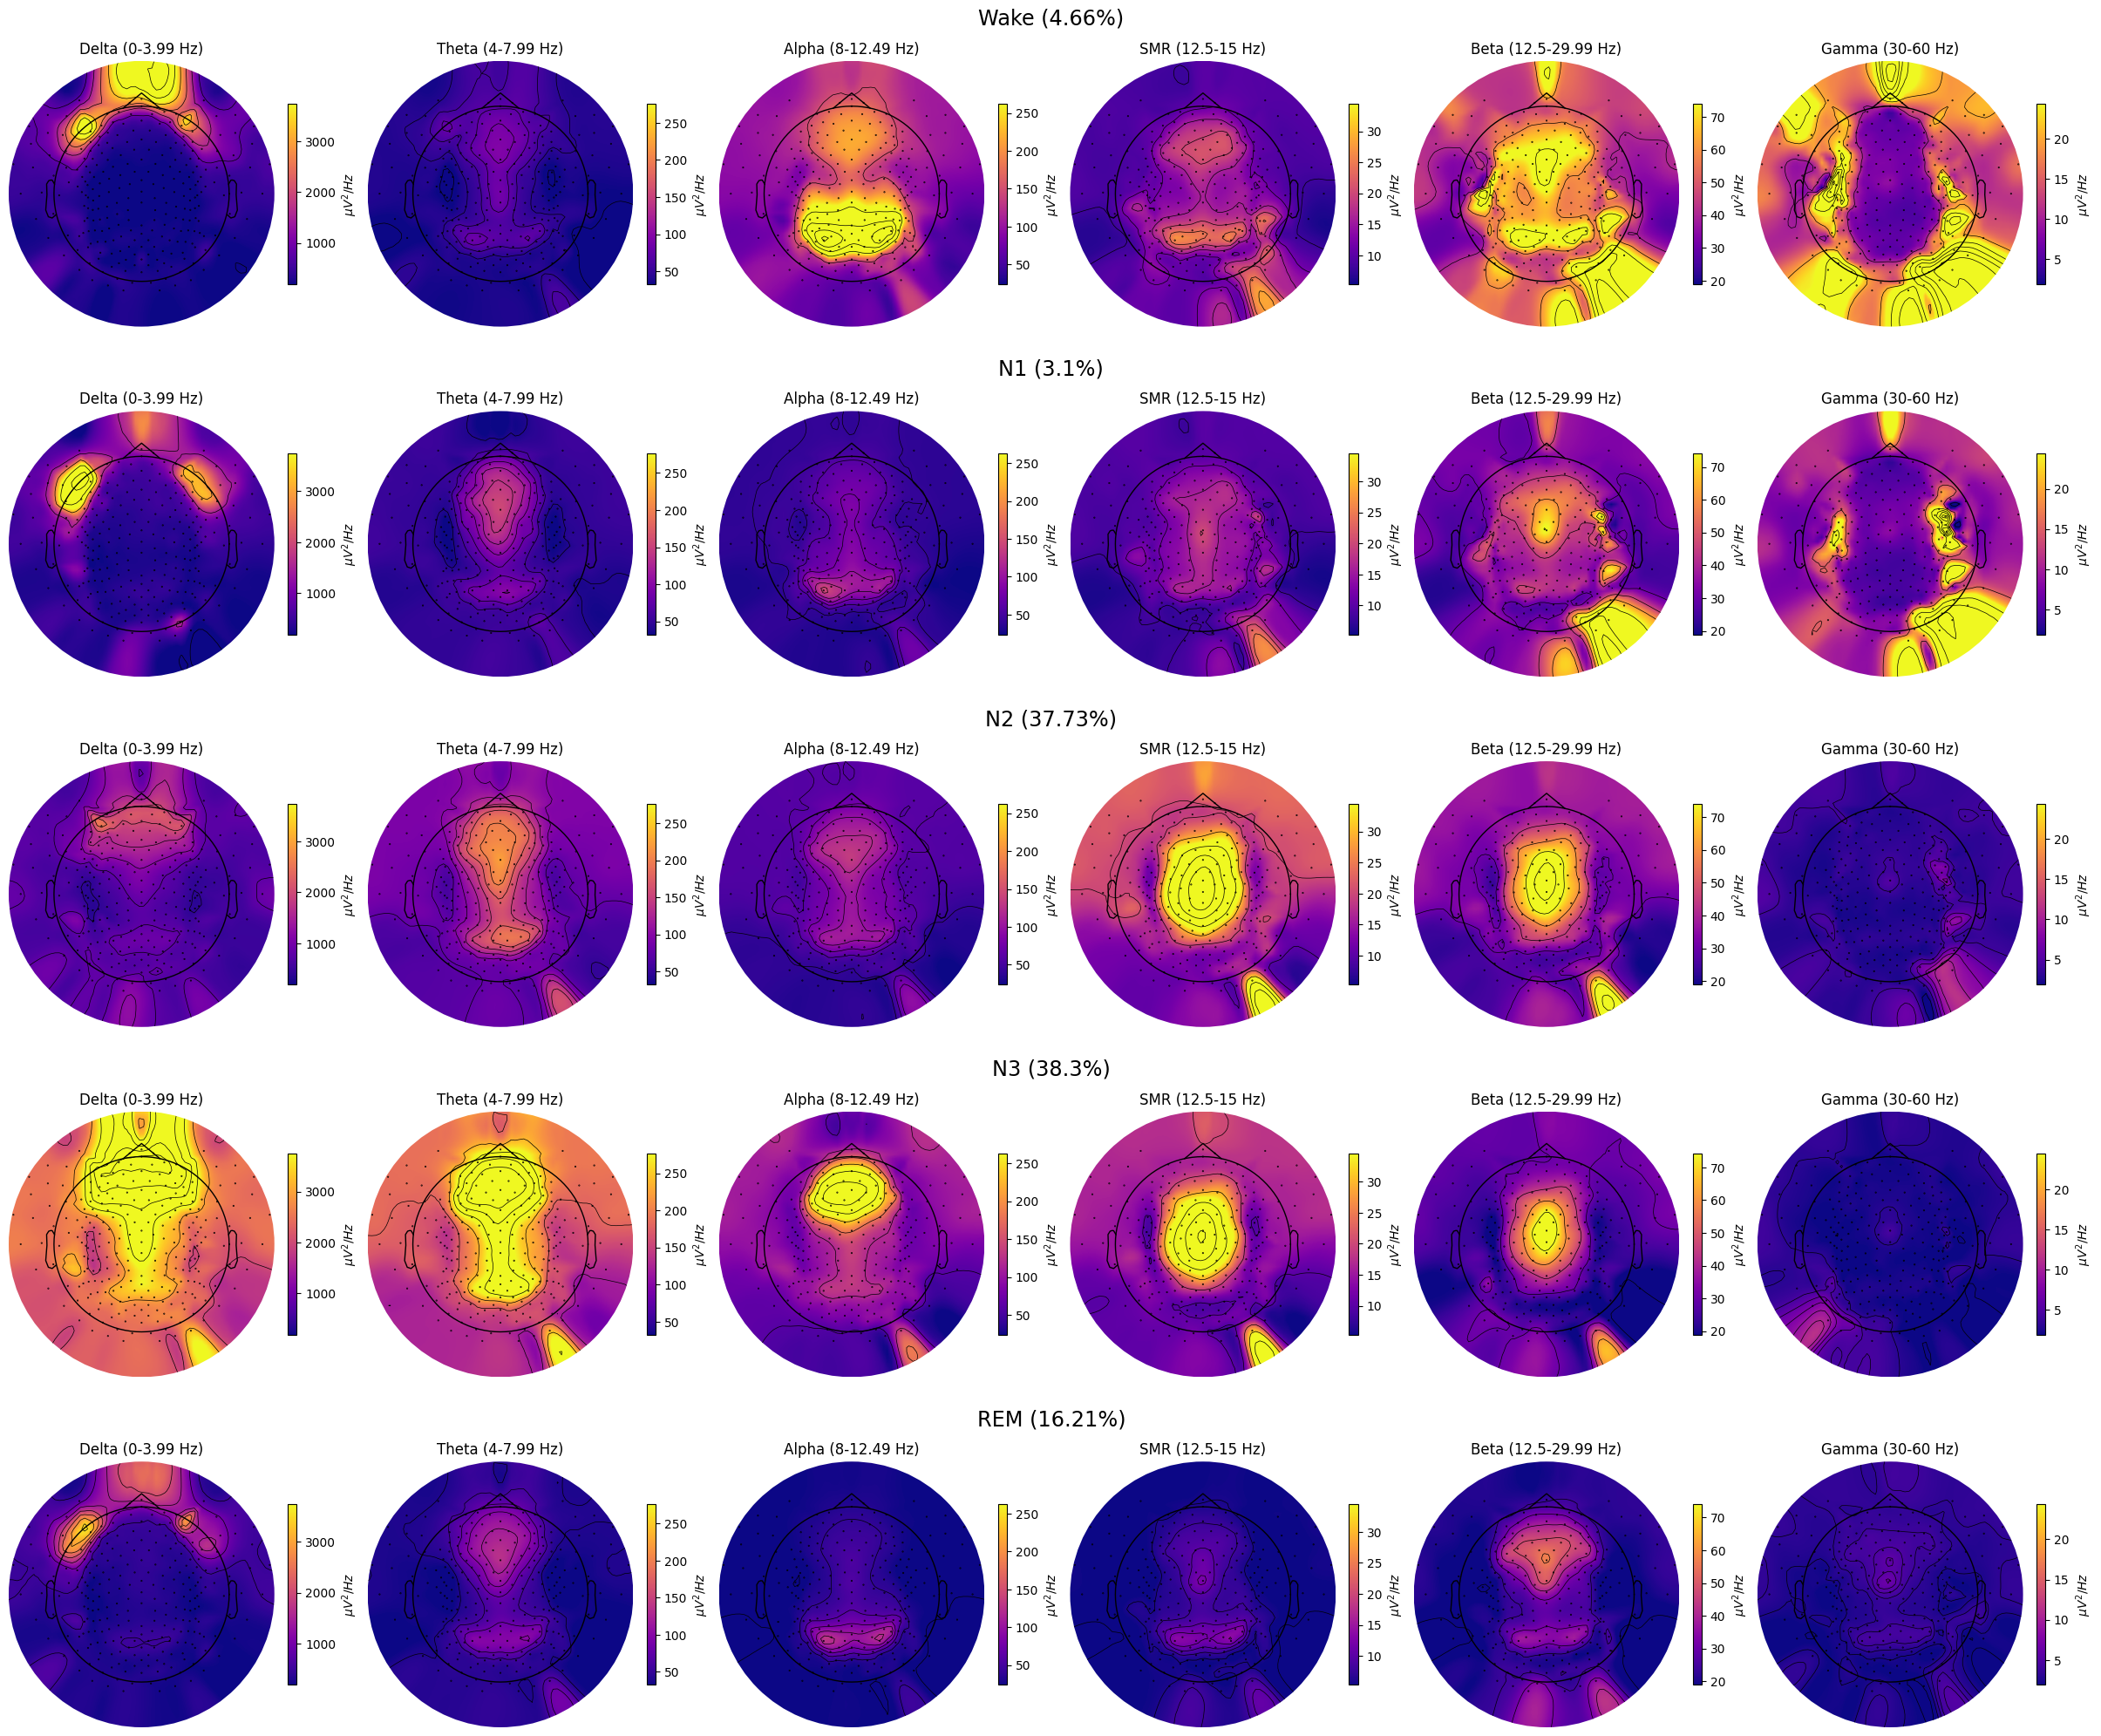

In [15]:
grand_pipe.plot_topomap_collage(
    #  Bands to plot topomaps for.
    bands={
        "Delta": (0, 3.99),
        "Theta": (4, 7.99),
        "Alpha": (8, 12.49),
        "SMR": (12.5, 15),
        "Beta": (12.5, 29.99),
        "Gamma": (30, 60),
    },
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all",
    dB=False,  # Whether to transform PSD to dB/Hz.
    low_percentile=5,  # Set min color value by percentile of the band data.
    high_percentile=95,  # Set max color value by percentile of the band data.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    figure_args=None,  # Arguments passed to the plt.figure().
)